In [1]:
import torch

In [4]:
from models.whisper import Whisper, WhisperConfig

In [5]:
config_file = 'whisper_model.yaml'
from yaml import safe_load
with open(config_file) as f:
	config = safe_load(f)
config = WhisperConfig(**config['init_args'])

In [ ]:
model = Whisper(config)
model.load_from_checkpoint('experiments/atis-v1/atis-v1-nb_6-nc_3-v_1000/checkpoints/last.ckpt')

In [18]:
from datasets.atis import ATISDataset, ATISDatasetConfig

config = ATISDatasetConfig(dec_max_len= 512,
    mel_dir= 'data/atis/mel_normalised/train',
    sp_model= 'data/atis/atis_1000.model',
    transcripts_file= 'data/atis/train.txt')
dataset = ATISDataset(config)

DS INIT: ATISDatasetConfig(sp_model='data/atis/atis_1000.model', mel_dir='data/atis/mel_normalised/train', transcripts_file='data/atis/train.txt', dec_max_len=512, first_n_lines=None)
DS HEAD:
    file_id                                         transcript  \
0  tw0064ss  SHOW ME ALL NONSTOP FLIGHTS FROM SALT LAKE CIT...   
1  x02074ss               WHAT IS THE MEANING OF MEAL CODE S\n   
2  eu0054ss  WHAT FLIGHTS ARE BETWEEN WASHINGTON AND SAN FR...   
3  f90056ss  WHAT IS THE DISTANCE BETWEEN PITTSBURGH AIRPOR...   
4  ts00c4ss  SHOW ME THE CHEAPEST ROUND TRIP FARES FROM SAN...   

                                                 mel  
0  [[-6.6064786e-05, -6.599297e-05, -6.587735e-05...  
1  [[-6.592606e-05, -6.574575e-05, -6.6027016e-05...  
2  [[-6.562473e-05, -6.505798e-05, -6.5318425e-05...  
3  [[-6.407649e-05, -6.319171e-05, -6.339708e-05,...  
4  [[-6.5960994e-05, -6.5988526e-05, -6.596037e-0...  
DS INIT COMPLETE


In [20]:
dl = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=ATISDataset.get_collate_function())

In [21]:
batch = next(iter(dl))

In [22]:
batch

WhisperInputBatch(x_src=tensor([[[-6.6065e-05, -6.6072e-05, -6.6072e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05],
         [-6.5993e-05, -6.6062e-05, -6.6043e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05],
         [-6.5877e-05, -6.5999e-05, -6.6062e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05],
         ...,
         [-6.6027e-05, -6.5937e-05, -6.6032e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05],
         [-6.4551e-05, -6.5430e-05, -6.5946e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05],
         [-6.5672e-05, -6.5821e-05, -6.6032e-05,  ..., -6.6073e-05,
          -6.6073e-05, -6.6073e-05]]]), x_tgt=tensor([[  1,  66,  47,   6,  98, 972, 978,   8, 979, 973, 975, 989,  18, 986,
         982, 973, 979,  16,  17,  43, 973, 374, 187,  10, 462, 988, 977, 978,
         978]]), x_src_mask=tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True, 

In [23]:
output = model(batch.x_src, batch.x_tgt, batch.x_src_mask, batch.x_tgt_mask)
output.shape

torch.Size([1, 29, 15000])

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def plot_attention_weights(attention_weights: dict, head: int = 0):
	n_columns = 4
	n_rows = len(attention_weights) // n_columns + 1
	fig_size = (n_columns * 5, n_rows * 4)
	fig, axs = plt.subplots(n_rows, n_columns, figsize=fig_size)
	for i, (name, weights) in enumerate(attention_weights.items()):
		ax = axs[i // n_columns, i % n_columns]
		ax.set_title(name)
		sns.heatmap(weights[0, head].detach().numpy(), ax=ax)
	fig.tight_layout()


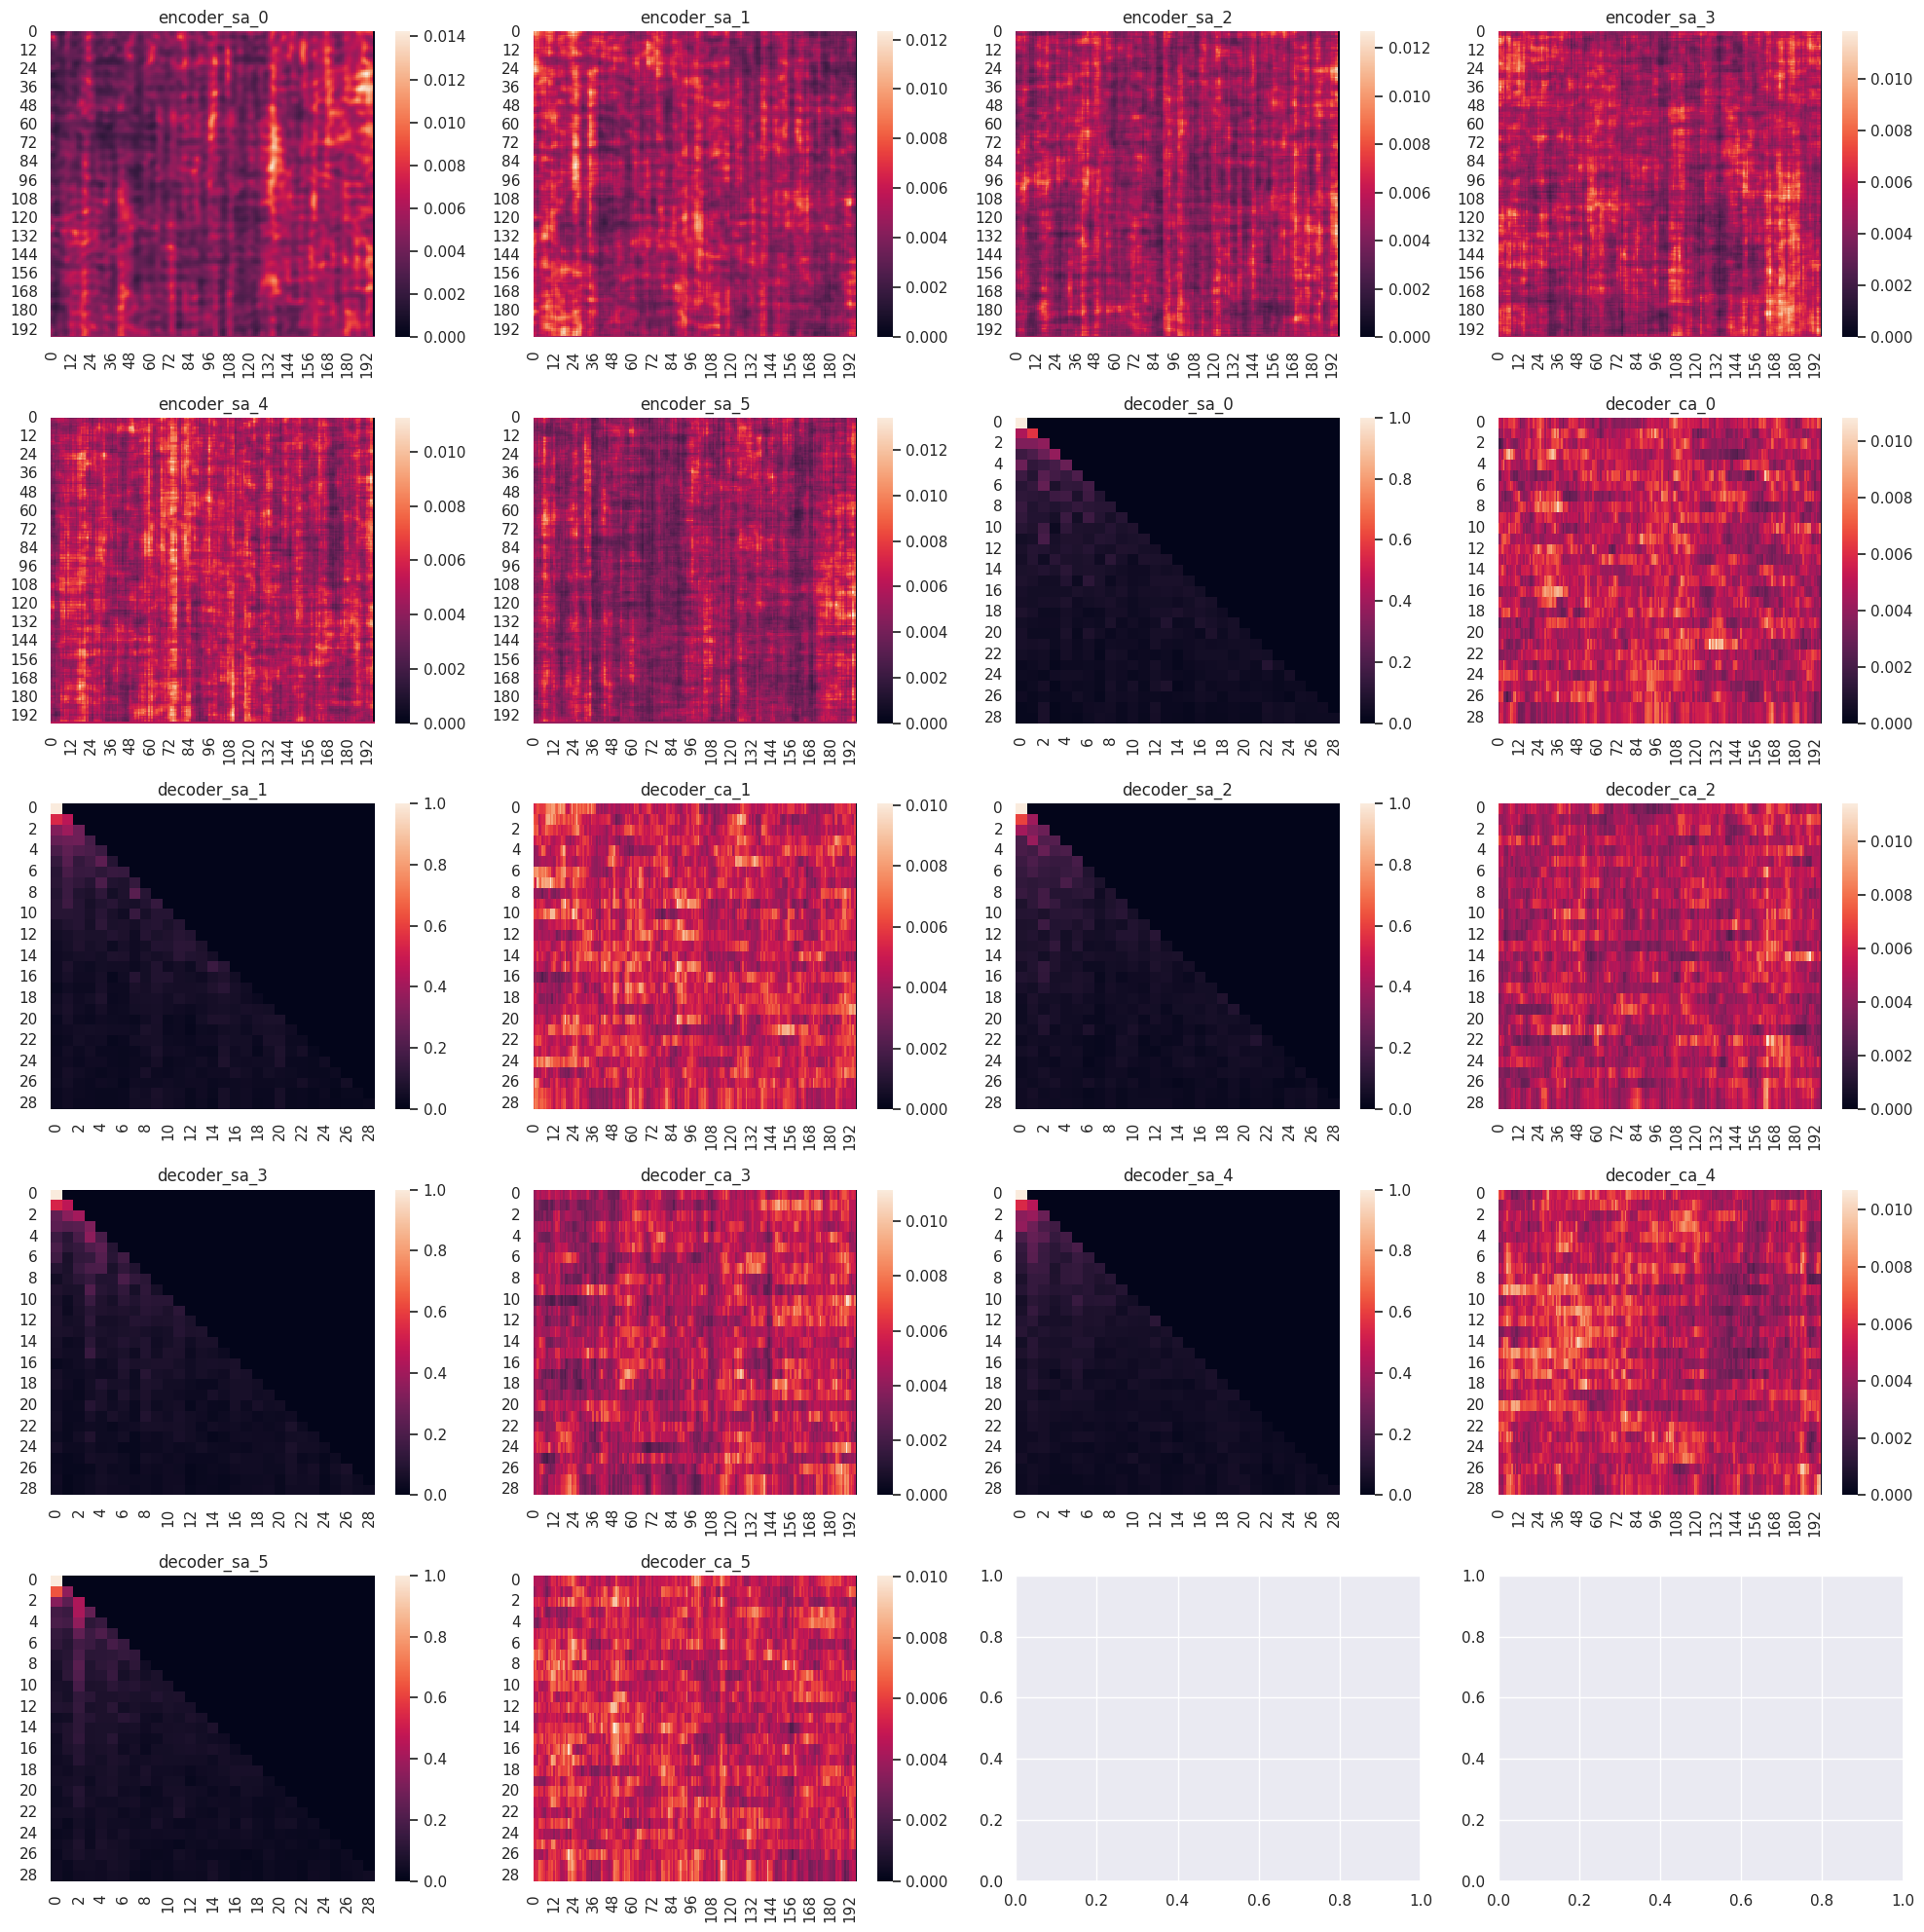

In [31]:
plot_attention_weights(model.attention_weights, 3)